In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Import our input dataset
df = pd.read_csv('Resources/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Getting the count of Diabetes vs No Diabetes
diabetes_counts = df["diabetes"].value_counts()
diabetes_counts

diabetes
0    91500
1     8500
Name: count, dtype: int64

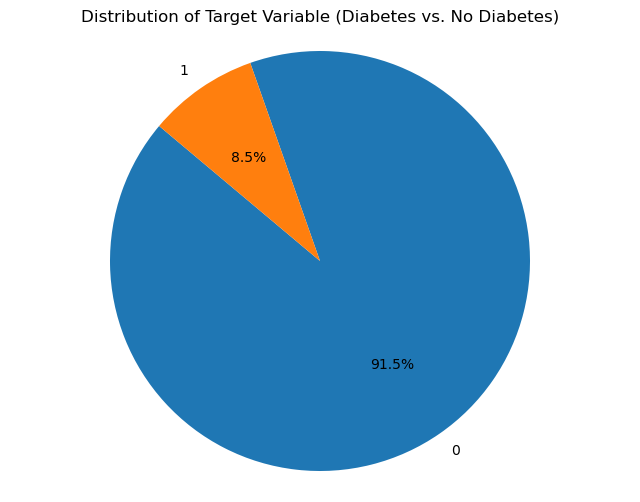

In [4]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable (Diabetes vs. No Diabetes)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
# Select categorical columns
categorical_cols = ['gender', 'smoking_history']

# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols).astype("int")
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25,6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,0,27,6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,0,27,5,158,0,0,1,0,0,0,0,0,1,0
3,36,0,0,23,5,155,0,1,0,0,0,1,0,0,0,0
4,76,1,1,20,4,155,0,0,1,0,0,1,0,0,0,0


In [6]:
# Separate the Features (X) from the Target (y)
y = df_encoded["diabetes"]
X = df_encoded.drop(columns="diabetes")

In [7]:
# Split our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(75000, 15)

In [8]:
# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [9]:
# Create a logistic regression model
lr_model = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
lr_model

LogisticRegression(max_iter=200, random_state=1)

In [10]:
# Fit (train) or model using the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [12]:
# Score the model using the test data
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9587333333333333
Testing Data Score: 0.95784


In [13]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred_lr, "Actual": y_test}).reset_index(drop=True)
results.tail(30)

,Prediction,Actual
24970,0,0
24971,0,1
24972,0,0
24973,0,0
24974,0,0
24975,0,0
24976,0,0
24977,0,0
24978,0,0
24979,0,0


In [14]:
# Get feature coefficients
coefficients = lr_model.coef_[0]

# Get feature names
feature_names = X_train.columns.tolist()

# Create a DataFrame to display coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value to identify the most important features
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print or visualize the coefficients DataFrame
print(coefficients_df)

                        Feature  Coefficient  Absolute Coefficient
4                   HbA1c_level     2.153750              2.153750
5           blood_glucose_level     1.356556              1.356556
0                           age     1.031070              1.031070
3                           bmi     0.583149              0.583149
1                  hypertension     0.200801              0.200801
9       smoking_history_No Info    -0.197897              0.197897
2                 heart_disease     0.143249              0.143249
10      smoking_history_current     0.091877              0.091877
13        smoking_history_never     0.079281              0.079281
8                  gender_Other    -0.073941              0.073941
7                   gender_Male     0.072505              0.072505
6                 gender_Female    -0.070525              0.070525
12       smoking_history_former     0.062304              0.062304
11         smoking_history_ever     0.056068              0.05

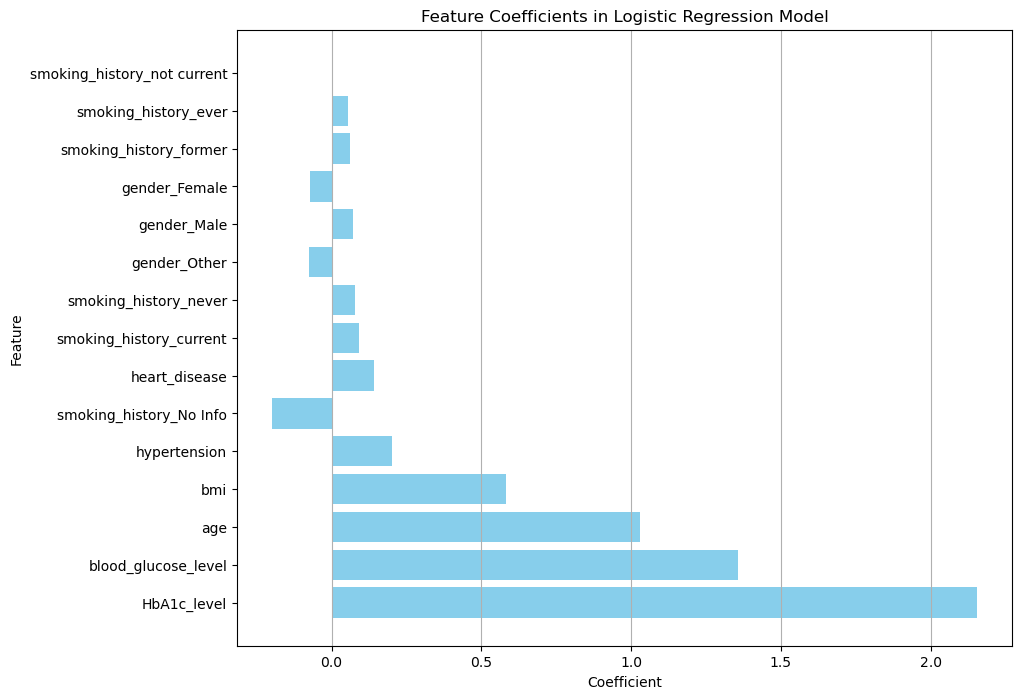

In [16]:
# Extract features and coefficients from the DataFrame
features = coefficients_df['Feature']
coefficients = coefficients_df['Coefficient']

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.grid(axis='x')  # Adding gridlines for better readability
plt.show()

In [17]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[22679   196]
 [  858  1267]]


In [18]:
# Calculate the Accuracy Score
accuracy_score(y_test, y_pred_lr)

0.95784

In [19]:
# Classification Report
report_logistic_regression = classification_report(y_test, y_pred_lr)
print(report_logistic_regression)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22875
           1       0.87      0.60      0.71      2125

    accuracy                           0.96     25000
   macro avg       0.91      0.79      0.84     25000
weighted avg       0.96      0.96      0.95     25000



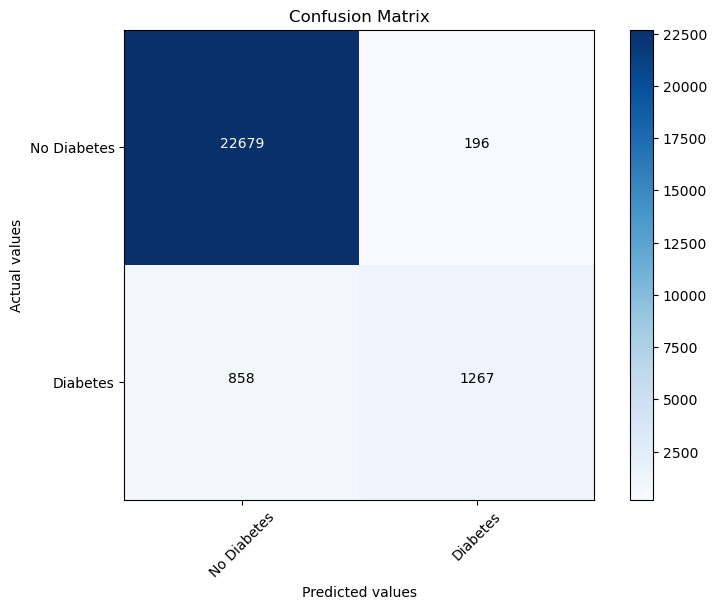

In [20]:
# Define class labels
classes = ['No Diabetes', 'Diabetes']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to axes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


# Random Forest  Model

In [21]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [22]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

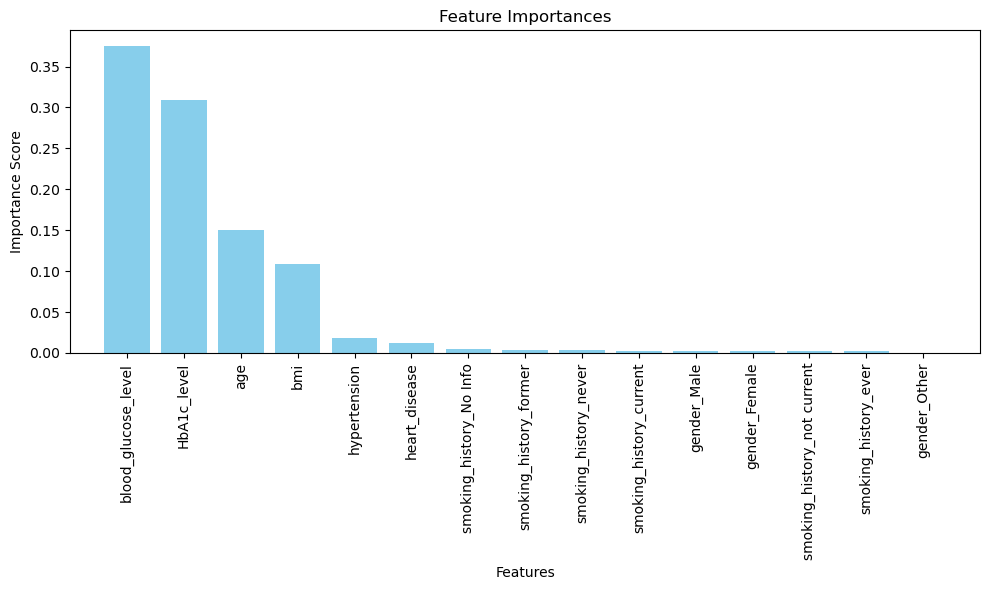

In [23]:
# Obtain feature importance scores
importances = rf_model.feature_importances_

# Sort feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Extract feature names from X_train
feature_names = X_train.columns.tolist()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_rf)

In [25]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
report_random_forest = classification_report(y_test, y_pred_rf)
print(report_random_forest)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,22722,153
Actual 1,740,1385


Accuracy Score : 0.96428
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.90      0.65      0.76      2125

    accuracy                           0.96     25000
   macro avg       0.93      0.82      0.87     25000
weighted avg       0.96      0.96      0.96     25000



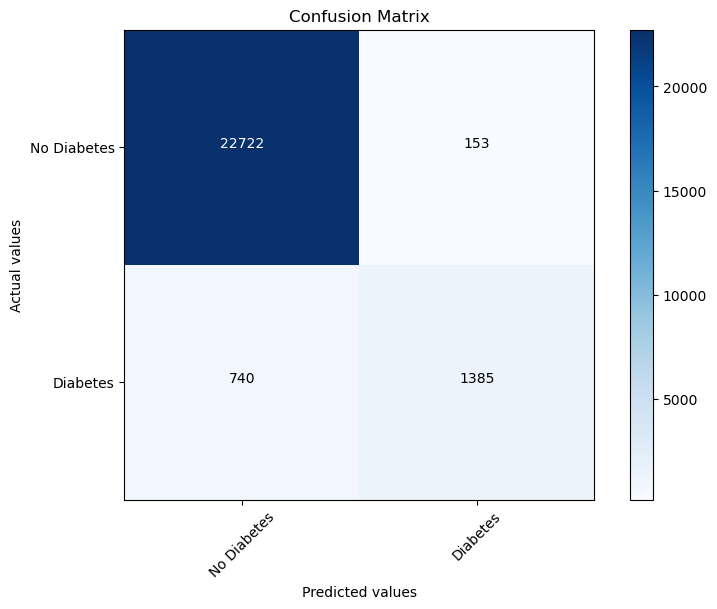

In [27]:
# Define class labels
classes = ['No Diabetes', 'Diabetes']  
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to axes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()


# Comparing the results of both the models

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22875
           1       0.87      0.60      0.71      2125

    accuracy                           0.96     25000
   macro avg       0.91      0.79      0.84     25000
weighted avg       0.96      0.96      0.95     25000

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.90      0.65      0.76      2125

    accuracy                           0.96     25000
   macro avg       0.93      0.82      0.87     25000
weighted avg       0.96      0.96      0.96     25000



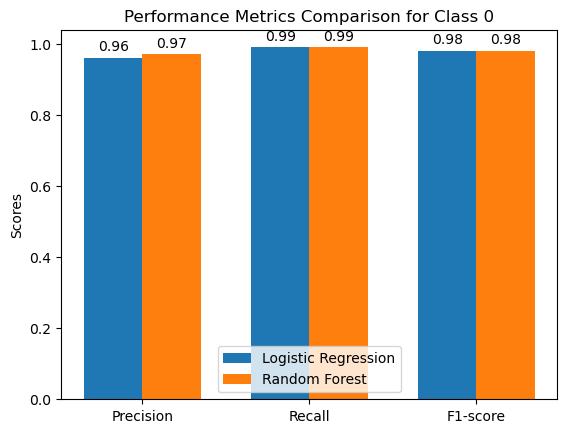

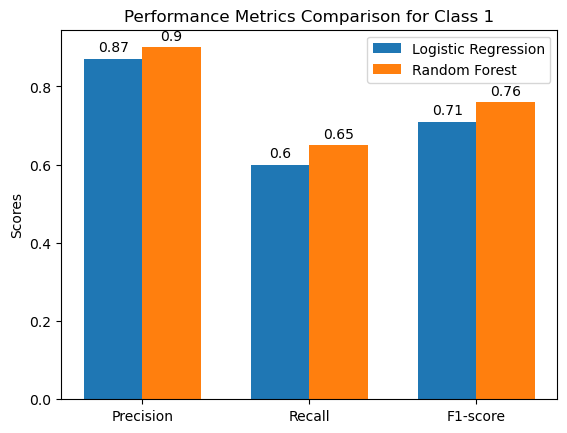

In [29]:
# Print both the classification reports for a side by side comparison
print(report_logistic_regression)
print(report_random_forest)
# Parse the classification reports to extract metrics for each class
def parse_class_metrics(report):
    lines = report.split('\n')
    class_metrics = {}
    for line in lines[2:-5]:
        if line.strip():  # Skip empty lines
            class_name, precision, recall, f1_score, _ = line.split()
            class_metrics[class_name.lower()] = {'precision': float(precision),
                                                  'recall': float(recall),
                                                  'f1_score': float(f1_score)}
    return class_metrics

class_metrics_lr = parse_class_metrics(report_logistic_regression)
class_metrics_rf = parse_class_metrics(report_random_forest)

# Plot the bar chart for each class
metrics = ['Precision', 'Recall', 'F1-score']
class_labels = ['0', '1']  

for i, class_label in enumerate(class_labels):
    lr_scores = [class_metrics_lr[class_label]['precision'], class_metrics_lr[class_label]['recall'], class_metrics_lr[class_label]['f1_score']]
    rf_scores = [class_metrics_rf[class_label]['precision'], class_metrics_rf[class_label]['recall'], class_metrics_rf[class_label]['f1_score']]

    x = range(len(metrics))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, lr_scores, width, label='Logistic Regression')
    rects2 = ax.bar([p + width for p in x], rf_scores, width, label='Random Forest')

    ax.set_ylabel('Scores')
    ax.set_title(f'Performance Metrics Comparison for Class {class_label}')
    ax.set_xticks([p + width/2 for p in x])
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add text annotations
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

plt.show()
